<a href="https://colab.research.google.com/github/Bibhuti-MLAI/Credit-Card-Default-Prediction/blob/main/Final_notebook_Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# **Business Objective:**


* **Objective of our project is to predict which customer might default in upcoming months. Before going any further let's have a quick look on defination of what actually meant by Credit Card Default.** 


* **We are all aware what is credit card. It is type of payment payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month.**




* **Credit card default happens when you have become severely delinquent on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.**

* **So now we know what a credit card is. Now let's see one of problems faced by companies who provide credit cards. Yes it is the peolpe who do not clear off the credit card debt aka credit card defaulters**.

* ***The research aims at developing a mechanism to predict the credit card default beforehand and to identify the potential customer base that can be offered various credit instruments so as to invite minimum default.***
 

# **Loading Dataset and Importing Modules**

In [1]:
#let's import the modules for EDA part
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##Mount the drive and import the datset

In [2]:
#let's mount the google drive for import the dtaset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load the seol bike data set from drive
credit_df=pd.read_excel("/content/drive/MyDrive/Credit card fraud detection -  Bibhuti Bhusan Sahu/default of credit card clients.xls",header = 1)

# **Understand More About The Data**

##summary of data

In [4]:
# Viewing the data of top 5 rows to take a glimps of the data
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# View the data of bottom 5 rows to take a glimps of the data
credit_df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [6]:
#Getting the shape of dataset with rows and columns
print(credit_df.shape)

(30000, 25)


In [7]:
#Getting all the columns
print("Features of the dataset:")
credit_df.columns

Features of the dataset:


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [8]:
#check details about the data set
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [9]:
#print the unique value
credit_df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [10]:
#Looking for the description of the dataset to get insights of the data
credit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


* ***This Dataset contains 30000 lines and 25 columns.*** 
* ***default payment next month is our target variable we need to focus on this***


##Features description

**Breakdown of Our Features:**

***We have records of 30000 customers. Below are the description of all features we have***.

* ***ID: ID of each client*** 

* ***LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)***

* ***SEX: Gender (1 = male, 2 = female)*** 

* ***EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)***

* ***MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)***

* ***AGE: Age in years***

**Scale for PAY_0 to PAY_6** : 

***(-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above***)

* ***PAY_0: Repayment status in September, 2005 (scale same as above***) 

* ***PAY_2: Repayment status in August, 2005 (scale same as above)***

* ***PAY_3: Repayment status in July, 2005 (scale same as above)***

* ***PAY_4: Repayment status in June, 2005 (scale same as above)***

* ***PAY_5: Repayment status in May, 2005 (scale same as above)***

* ***PAY_6: Repayment status in April, 2005 (scale same as above)***

* ***BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)***

* ***BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)***

* ***BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)***

* ***BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)***

* ***BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)***

* ***BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)***

* ***PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)***
* ***PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)***

* ***PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)***

* ***PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)***

* ***PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)***

* ***PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)***

* ***default.payment.next.month: Default payment (1=yes, 0=no)***

**NOTE:-**

 **What do 0 and -2 mean in PAY_X columns?**

***From dataset documentation:***

**PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above). Notice code 0 and 2 are in the PAY_X columns but are not included in the data description. Also by doing the value_counts, it shows 0 is the most frequent observation**. 
 
#### -2: No consumption; <br>-1: Paid in full; <br>0: The use of revolving credit, meaning the payment wasn't due, which makes sense that most customers were using the revolving credit.

https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/discussion/34608

***In our dataset we got customer credit card transaction history for past 6 month , on basis of which we have to predict if cutomer will default or not.***



# **Preprocessing the dataset**

**Why do we need to handle missing values?**
* ***The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first*** 

##Missing values

In [11]:
#check for count of missing values in each column.
credit_df.isna().sum()
credit_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

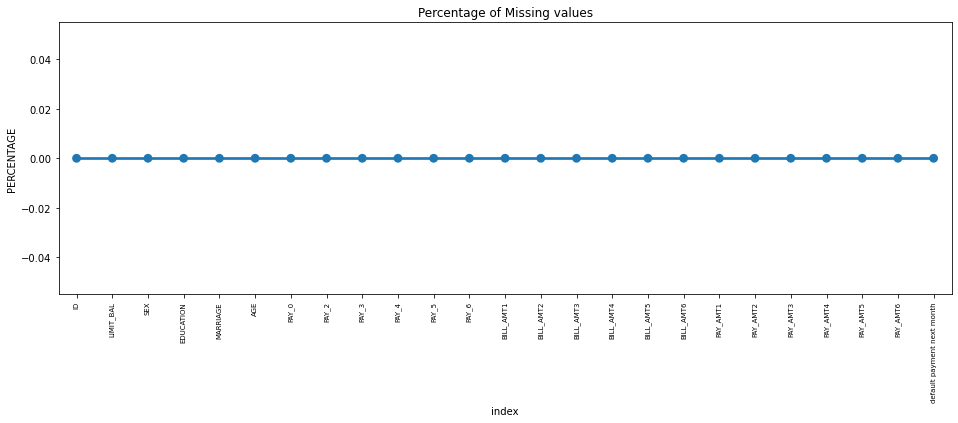

In [12]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((credit_df.isnull().sum())*100/credit_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

* ***As we can see above there are no missing value presents thankfully***

##Duplicate values

**Why is it important to remove duplicate records from my data?** 
* ***"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set,  Time and money are saved by not sending identical communications multiple times to the same person.***

In [13]:
# Checking Duplicate Values
value=len(credit_df[credit_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


* ***In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.***

# **Exploratory Data Analysis**

**Why do we perform EDA?**
* ***An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.***

## **Univariate Analysis**

**Why do you do univariate analysis?**
* ***The key objective of Univariate analysis is to simply describe the data to find patterns within the data.*** 

## **Analysis of Dependent Variable:**

**What is a dependent variable in data analysis?**
* ***we analyse our dependent variable,A dependent variable is a variable whose value will change depending on the value of another variable.***

**What does 'default.payment.next.month' mean?**

***Is it a predictor or actual data that was collected in the next month - Oct. 2005? According to the reply from the dataset contributor,it seems this is the actual data collected in the next month. "Y: client's behavior; Y=0 then not default, Y=1 then default". This information could be used to test the accuracy of the model that will be built.***

In [14]:
#renaming for better convinience
credit_df.rename(columns={'default payment next month' : 'default_payment_next_month'}, inplace=True)

In [15]:
# counts the dependent variable data set
credit_df['default_payment_next_month'].value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

In [16]:
# Get the proportion of customers who had default payment in the next month  
# About 22% customers had default payment next month

credit_df['default_payment_next_month'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default_payment_next_month, dtype: float64

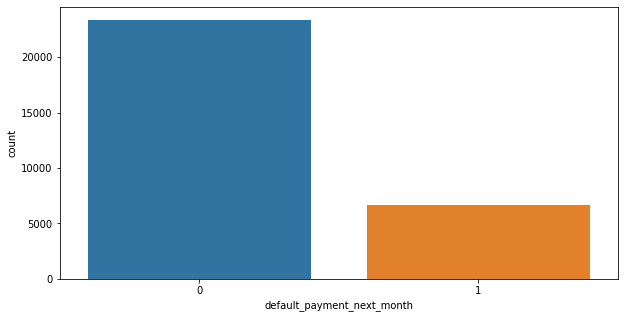

In [17]:
#plotting the count plot to vizualize the data distribution 
#plot the count plot to check the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'default_payment_next_month', data = credit_df)

**From the above data analysis we can say that**
*   **0 - Not Default**
*   **1 - Default**
*   **Defaulters are less than the Non Defaulters in the given dataset.**



***As we can see from above graph that both classes are not in proportion and we have imbalanced dataset. we need to do normalize the data in next step.***




## **Analysis of Independent Variable:**

## **Categorical  Features**

***We have few categorical features in our dataset that are***
*   sex
*   education
*   marraige 
*   age

***Categorical variables are qualitative data in which the values are assigned to a set of distinct groups or categories. These groups may consist of alphabetic (e.g., male, female) or numeric labels (e.g., male = 0, female = 1) that do not contain mathematical information beyond the frequency counts related to group membership.***

 ***Let'Check how they are related with out target class.***


### **SEX**



*   1 - Male
*   2 - Female


In [18]:
# counts the SEX variable data set
credit_df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

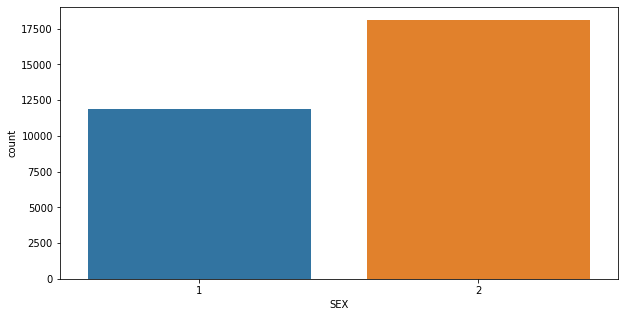

In [19]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'SEX', data = credit_df)

**From the above data analysis we can say that**
*   **1 - Male**
*   **2 - Female**
*   ***Number of Male credit holder is less than Female.***

### **Education**



 **1 = graduate school; 2 = university; 3 = high school; 0 = others**

In [20]:
# counts the education  data set variable data set
credit_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

***'EDUCATION' column: notice 5 and 6 are both recorded as 'unknown' and there is 0 which isn't explained in the dataset description. Since the amounts are so small, let's combine 0,4,5,6 to 0 which means"other'.***

In [21]:
# Change values 4, 5, 6 to 0 and define 0 as 'others'
# 1=graduate school, 2=university, 3=high school, 0=others

credit_df["EDUCATION"] = credit_df["EDUCATION"].replace({4:0,5:0,6:0})
credit_df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

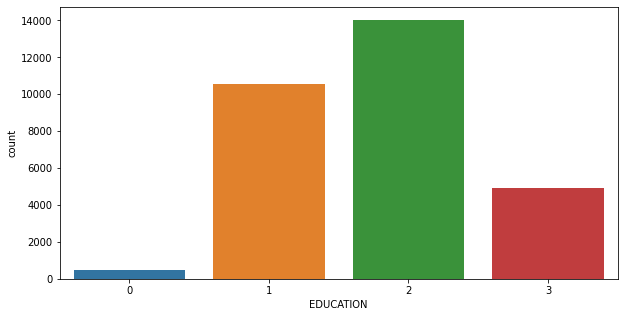

In [22]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'EDUCATION', data = credit_df)

**From the above data analysis we can say that**
*   ***More number of credit holders are university students followed by Graduates and then High school students.***

### **Marriage**


**1 = married; 2 = single; 3 = others**

In [23]:
# From dataset description: MARRIAGE: Marital status (1=married, 2=single, 3=others), but there is also 0

credit_df["MARRIAGE"].unique()

array([1, 2, 3, 0])

In [24]:
# counts the education  data set
credit_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [25]:
# How many customers had "MARRIAGE" status as 0?

credit_df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

***'MARRIAGE' column: what does 0 mean in 'MARRIAGE'?***
***Since there are only 0.18% (or 54) observations of 0, we will combine 0 and 3 in one value as 'others'.***

In [26]:
# Combine 0 and 3 by changing the value 0 into others

credit_df["MARRIAGE"] = credit_df["MARRIAGE"].replace({0:3})
credit_df["MARRIAGE"].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

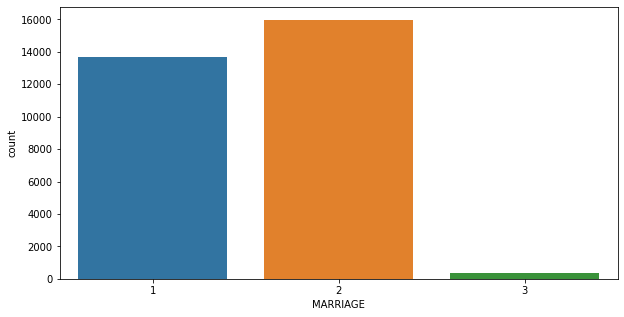

In [27]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.countplot(x = 'MARRIAGE', data = credit_df)

**From the above data analysis we can say that**
*   **1 - married**
*   **2 - single**
*   **3 - others**
*   ***More number of credit cards holder are Single.***


### **AGE**

**Plotting graph of number of ages of all people with credit card irrespective of gender.**

In [28]:
# counts the education  data set
credit_df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
71       3
72       3
75       3
74       1
79       1
Name: AGE, dtype: int64

In [29]:
#check the mean of the age group rescpective to the default_payment_next_month
credit_df.groupby('default_payment_next_month')['AGE'].mean()

default_payment_next_month
0    35.417266
1    35.725738
Name: AGE, dtype: float64

In [30]:
credit_df = credit_df.astype('int')

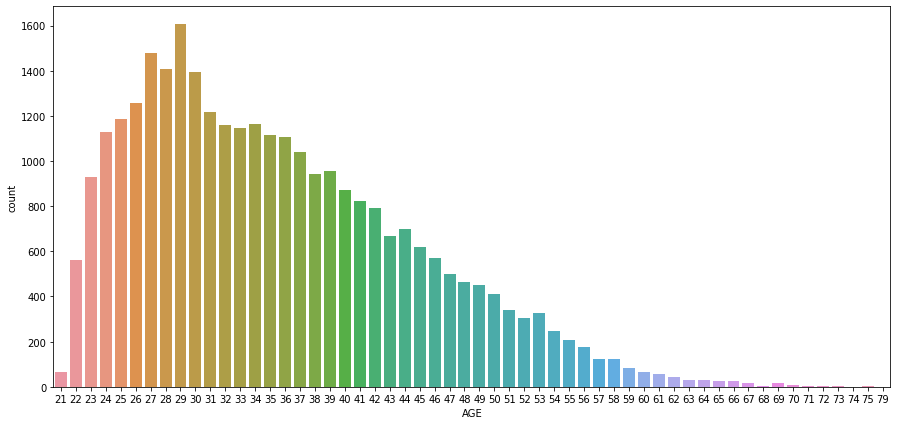

In [31]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(15,7))
sns.countplot(x = 'AGE', data = credit_df)
plt.show()

**From the above data analysis we can say that**
*  ***We can see more number of credit cards holder age are between 26-30 years old.***
*  ***Age above 60 years old rarely uses the credit card.***



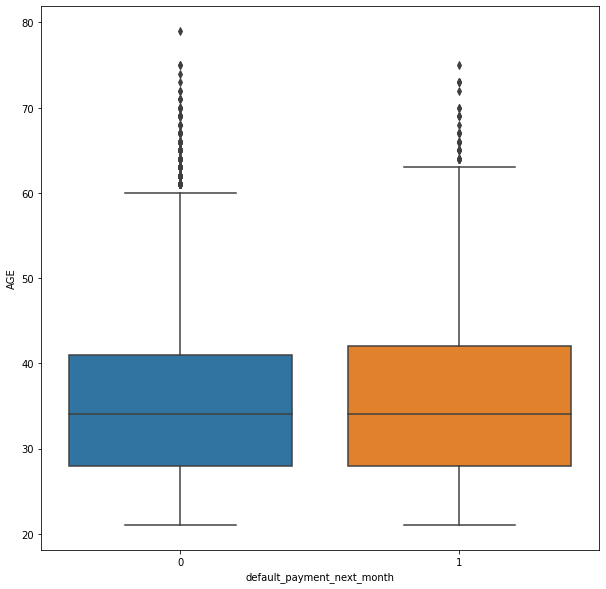

In [32]:
#plotting the box plot to vizualize the data distribution
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="default_payment_next_month", y="AGE", data=credit_df)

## **Numerical features**


**What is Numerical Data**

* ***Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.***

### **Limit Balance**

In [33]:
# describe  the limit balance  data set
credit_df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

***Distribution of LIMIT_BAL.***

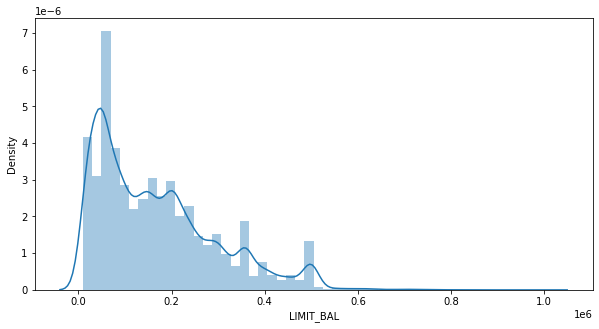

In [34]:
#plotting the dist plot to vizualize the data distribution
plt.figure(figsize=(10,5))
sns.distplot(credit_df['LIMIT_BAL'], kde=True)
plt.show()

**From the above data analysis we can say that**
* ***Maximum amount of given credit in NT dollars is 50,000 followed by 30,000 and 20,000.***

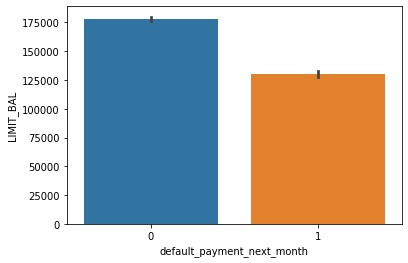

In [35]:
#plotting the bar plot to vizualize the data distribution
sns.barplot(x='default_payment_next_month', y='LIMIT_BAL', data=credit_df)

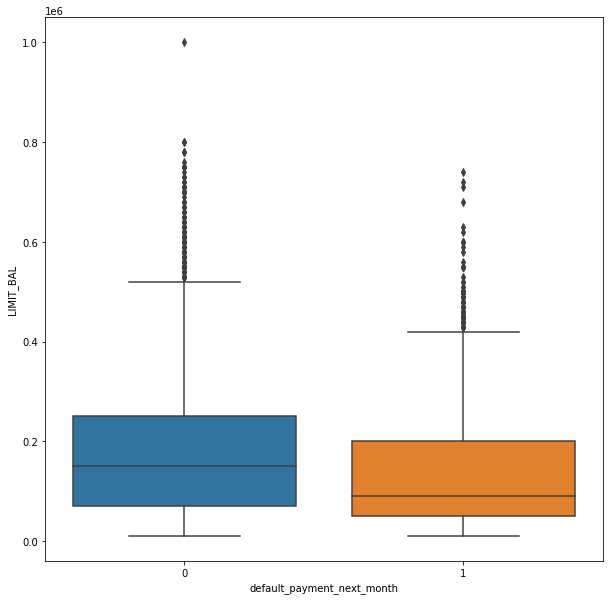

In [36]:
#plotting the box plot to vizualize the data distribution
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="default_payment_next_month", y="LIMIT_BAL", data=credit_df)

##**Renaming columns**

In [37]:
#renaming columns 

credit_df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
credit_df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
credit_df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [38]:
#check details about the data set
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_SEPT                    30000 non-null  int64
 7   PAY_AUG                     30000 non-null  int64
 8   PAY_JUL                     30000 non-null  int64
 9   PAY_JUN                     30000 non-null  int64
 10  PAY_MAY                     30000 non-null  int64
 11  PAY_APR                     30000 non-null  int64
 12  BILL_AMT_SEPT               30000 non-null  int64
 13  BILL_AMT_AUG                30000 non-null  int64
 14  BILL_A

In [39]:
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


###**Total Bill Amount**

**What does SNS Pairplot do?**
* ***pairplot. Plot pairwise relationships in a dataset. By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column.***

In [40]:
#assign the bill amount variable to a single variable 
total_bill_amnt_df = credit_df[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]

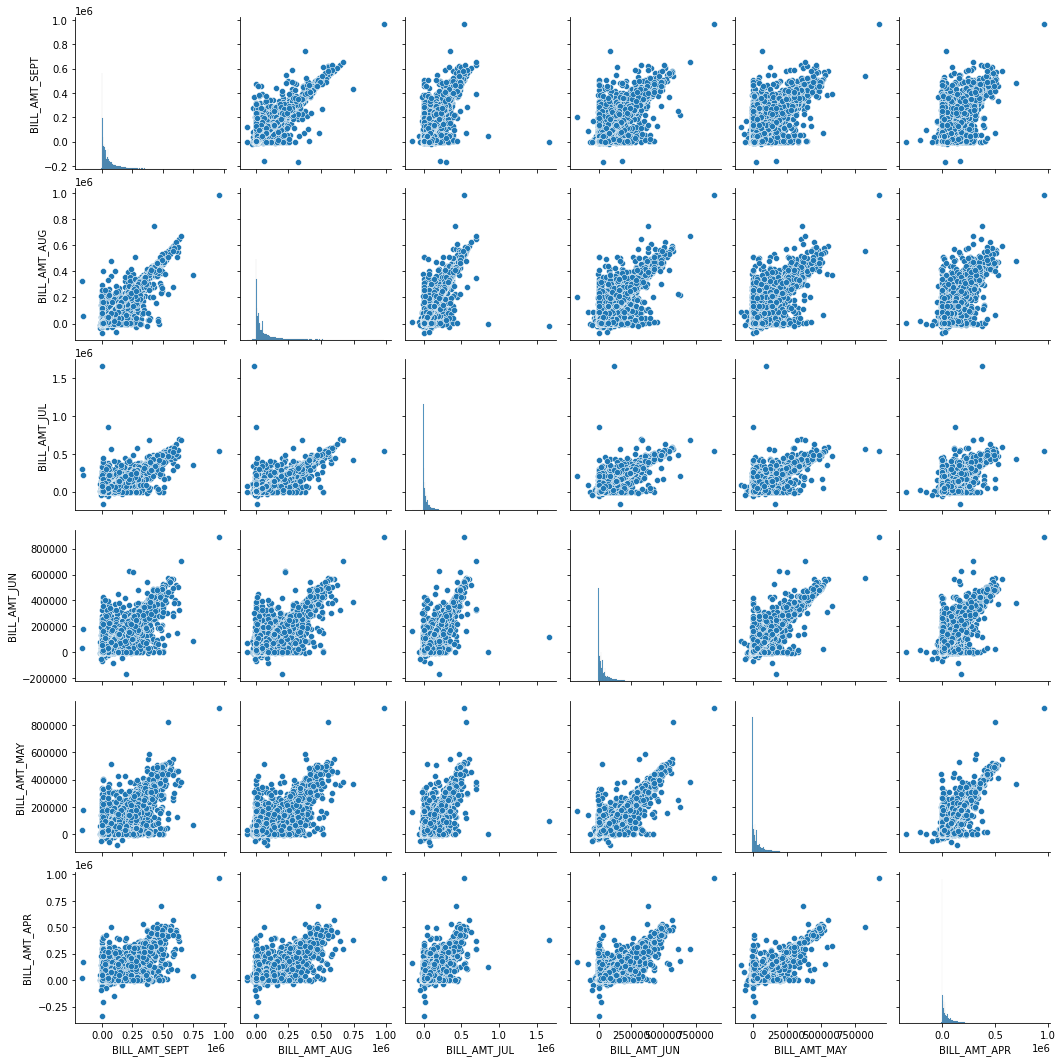

In [41]:
#plotting the pair plot for bill amount 
sns.pairplot(data = total_bill_amnt_df)

### **Previous payment status**

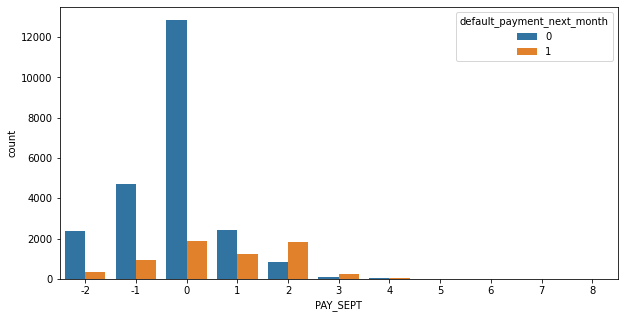

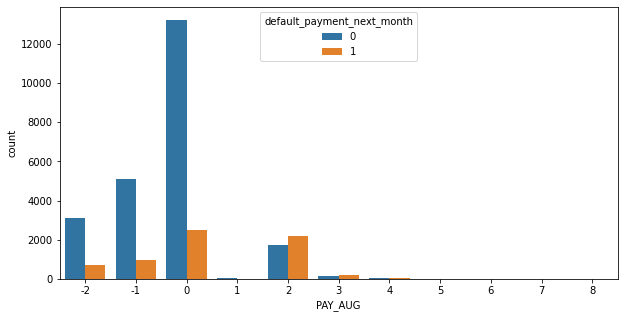

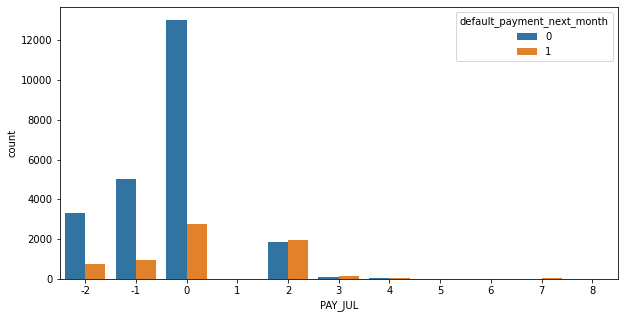

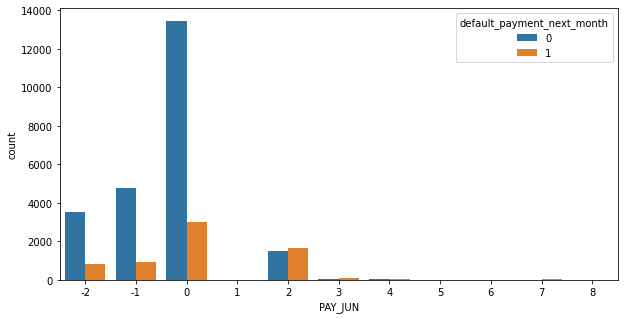

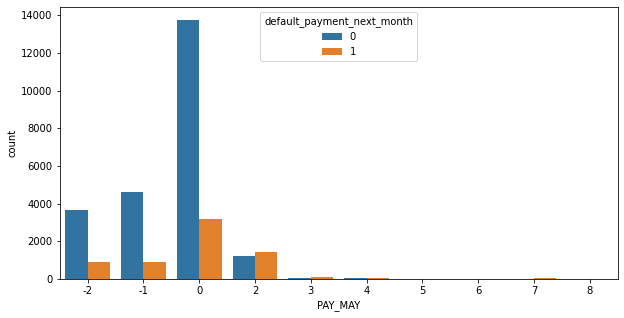

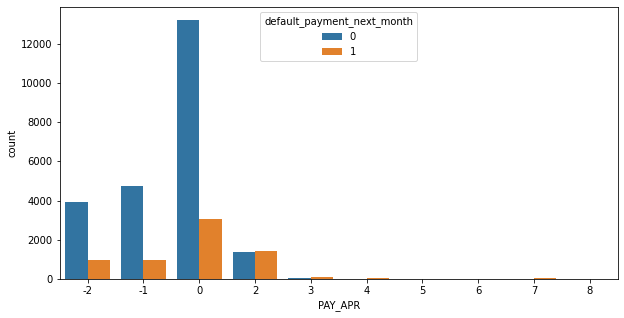

In [42]:
#plotting the count plot for Previous payment status
pre_payment = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in pre_payment:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'default_payment_next_month', data = credit_df)

###**Paid Amount**

In [43]:
#assign the Paid Amount variable to a single variable 
pay_amnt_df = credit_df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR', 'default_payment_next_month']]

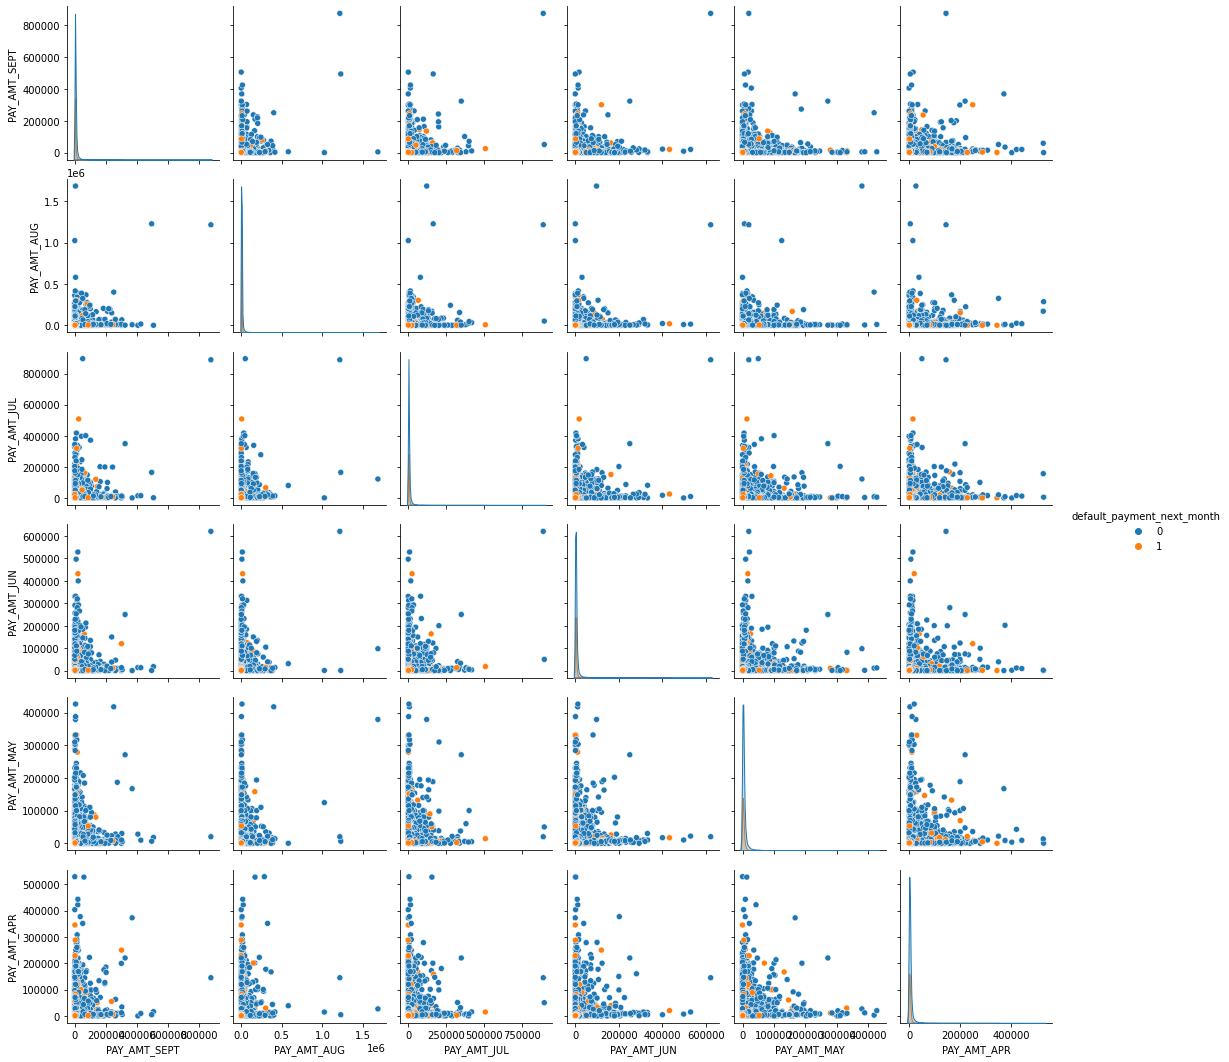

In [44]:
#plotting the pair plot for paid amount
sns.pairplot(data = pay_amnt_df, hue='default_payment_next_month')

In [45]:
credit_df.shape

(30000, 25)

##**Bivariate Analysis**

**what is bivariate analysis**
* ***Bivariate analysis is one of the simplest forms of quantitative analysis. It involves the analysis of two variables, for the purpose of determining the empirical relationship between them. Bivariate analysis can be helpful in testing simple hypotheses of association***

###**Sex and default_payment_next_month**

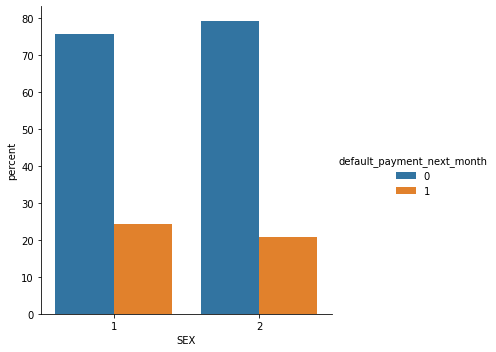

In [46]:
#plotting the cat plot to vizualize the data distribution related to the default_payment_next_month
x,y = 'SEX', 'default_payment_next_month'

(credit_df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

* ***It is evident from the above graph that the number of defaulter have high proportion of males.***

### **Education and default_payment_next_month**

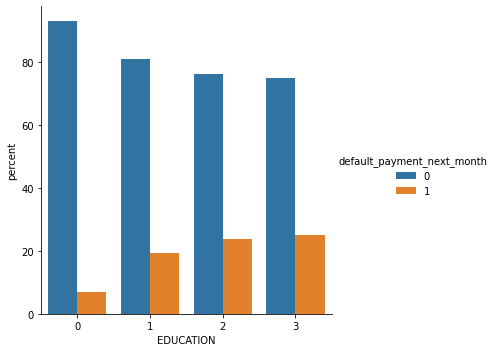

In [47]:
#plotting the cat plot to vizualize the data distribution related to the default_payment_next_month
x,y = 'EDUCATION', 'default_payment_next_month'

(credit_df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

* ***From the above plot it is clear that those people who are other students have higher default payment wrt graduates and university people***

###**Marriage and default_payment_next_month**

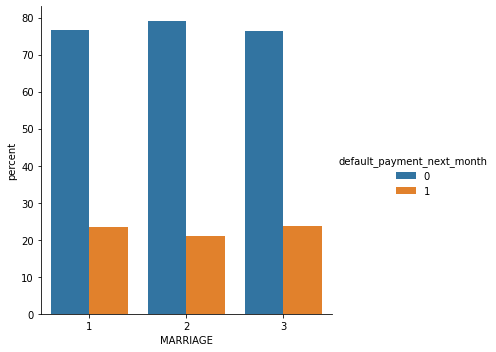

In [48]:
#plotting the cat plot to vizualize the data distribution related to the default_payment_next_month
x,y = 'MARRIAGE', 'default_payment_next_month'

(credit_df
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

* ***High defaulter rate when it comes to others*** 

### **Age and default_payment_next_month**

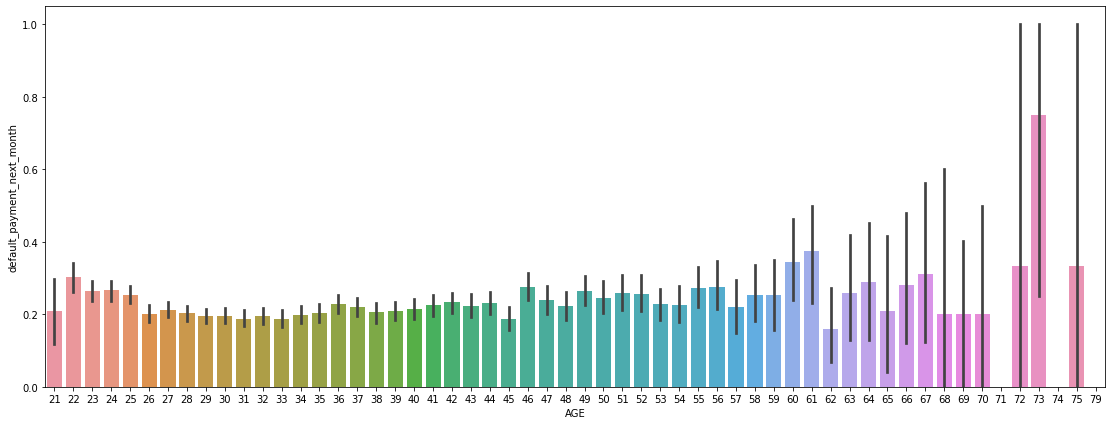

In [49]:
#plotting the bar plot to vizualize the data distribution related to the default_payment_next_month
plt.figure(figsize=(19,7))
sns.barplot(x = 'AGE', y = 'default_payment_next_month', data = credit_df)

plt.show()

* **Slightly higher defaulter rate in  60's**. 




##**Checking of Correlation between variables**

* **we check correletion betweeen variables using Correlation heatmap, it is graphical representation of correlation matrix representing correlation between different variables**

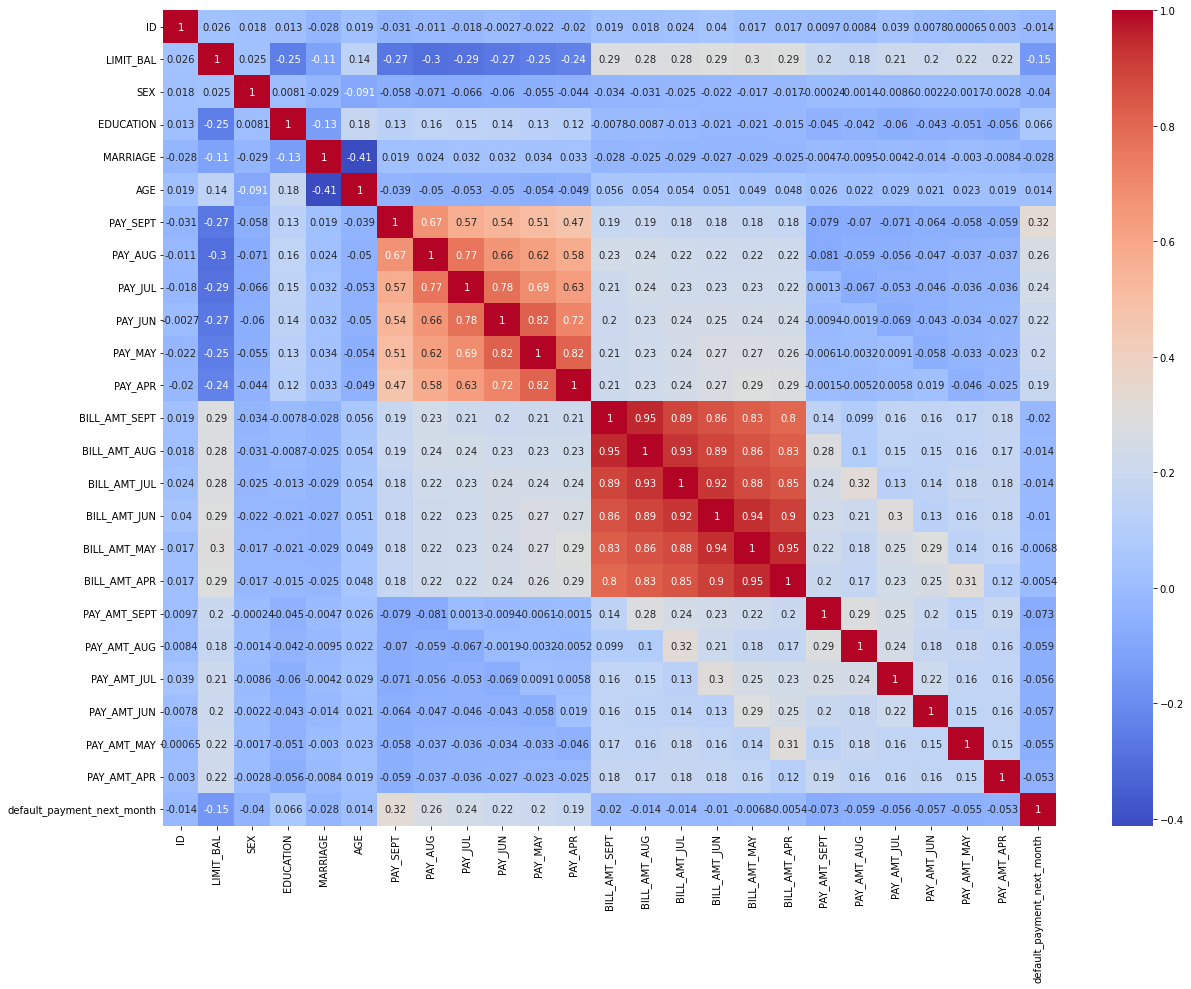

In [50]:
#plotting the heatmap 
plt.figure(figsize=(20,15))
sns.heatmap(credit_df.corr(),annot=True,cmap="coolwarm")

* ***It seems from the above graph is there are some negatively correlated feature like age but we cannot blindly remove this feature because it could be important feature for prediction.*** 
* ***ID is unimportant and it has no role in prediction so we will remove it.***


#**SMOTE**

* ***In our data set we have  Imbalanced Data Distribution in our dependent variable, it  generally happens when observations in one of the class are much higher i.e not defaulter or lower than the other classes i.e defaulter.***

* ***As Machine Learning algorithms tend to increase accuracy by reducing the error, they do not consider the class distribution.***

* ***Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class. In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when the minority class has a negligible or very lesser recall.***
 
***SMOTE***

* ***SMOTE (Synthetic Minority Oversampling Technique) – Oversampling is one of the most commonly used oversampling methods to solve the imbalance problem. 
It aims to balance class distribution by randomly increasing minority class examples by replicating them.*** 
 

In [51]:
#import the module 
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(credit_df.iloc[:,0:-1], credit_df['default_payment_next_month'])

print('Original dataset shape', len(credit_df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [52]:
x_smote

array([[     1,  20000,      2, ...,      0,      0,      0],
       [     2, 120000,      2, ...,   1000,      0,   2000],
       [     3,  90000,      2, ...,   1000,   1000,   5000],
       ...,
       [ 17135,  30000,      2, ...,   1719,      0,   1000],
       [ 24662, 150000,      1, ...,   2000,   2000,   1832],
       [ 27623, 132805,      1, ...,   3359,   6531,   3264]])

In [53]:
columns = list(credit_df.columns)

In [54]:
columns.pop()

'default_payment_next_month'

In [55]:
balance_df = pd.DataFrame(x_smote, columns=columns)

In [56]:
balance_df['default_payment_next_month'] = y_smote

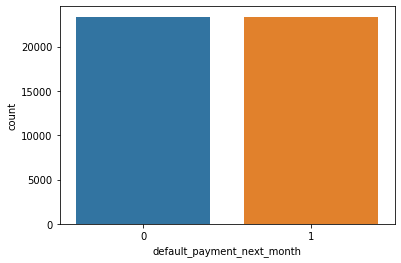

In [57]:
#plot the count plot after smote
sns.countplot('default_payment_next_month', data = balance_df)

In [58]:
balance_df[balance_df['default_payment_next_month']==1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000,1,2,2,30,1,2,2,0,0,2,65802,67369,65701,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000,1,1,2,24,0,0,2,2,2,2,15376,18010,17428,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000,2,2,1,39,-1,-1,-1,-1,-1,-1,316,316,316,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,2299,60000,1,2,1,37,2,2,1,2,1,1,30081,30403,31016,27462,28125,30171,1332,1334,823,1253,2620,1456,1
46724,18441,360000,2,1,2,34,-2,-2,-2,-1,-1,-2,-64,-64,-1,254,60,0,0,62,323,60,0,0,1
46725,17135,30000,2,2,1,49,0,0,0,0,0,2,14759,15756,18335,17860,19280,18832,1313,2904,1366,1719,0,1000,1
46726,24662,150000,1,2,1,44,0,0,0,0,0,0,145735,105716,93305,50088,35419,26309,5170,4037,2859,2000,2000,1832,1


# **Feature Engineering**

In [59]:
#save a copy file in other variable
credit_df_copy = balance_df.copy()

In [60]:
#assign the the sum of payment value in one 
credit_df_copy['total_Payement_Value'] = credit_df_copy['PAY_SEPT'] + credit_df_copy['PAY_AUG'] + credit_df_copy['PAY_JUL'] + credit_df_copy['PAY_JUN'] + credit_df_copy['PAY_MAY'] + credit_df_copy['PAY_APR']

In [61]:
#check the correlation by using mean
credit_df_copy.groupby('default_payment_next_month')['total_Payement_Value'].mean()

default_payment_next_month
0   -1.980140
1    1.697312
Name: total_Payement_Value, dtype: float64

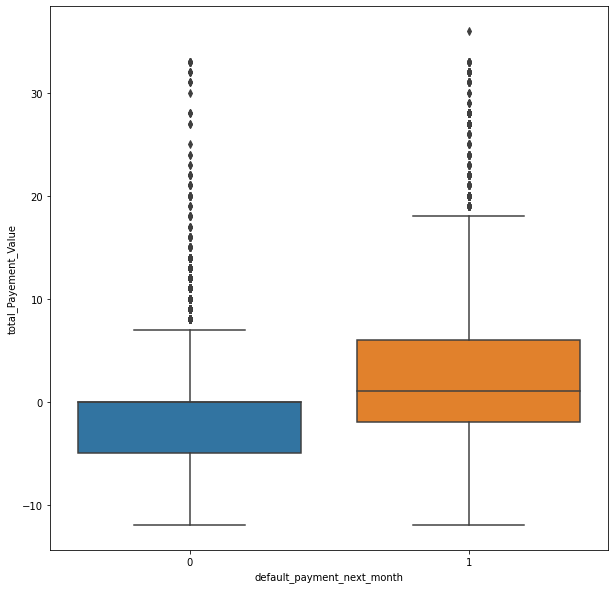

In [62]:
#plotting the box plot 
plt.figure(figsize=(10,10))
sns.boxplot(data = credit_df_copy, x = 'default_payment_next_month', y = 'total_Payement_Value' )

In [63]:
#create a new column due by calculating the sum of total bill ammount substract it from the total amont paid
credit_df_copy['Dues'] = (credit_df_copy['BILL_AMT_APR']+credit_df_copy['BILL_AMT_MAY']+credit_df_copy['BILL_AMT_JUN']+credit_df_copy['BILL_AMT_JUL']+credit_df_copy['BILL_AMT_SEPT'])-(credit_df_copy['PAY_AMT_APR']+credit_df_copy['PAY_AMT_MAY']+credit_df_copy['PAY_AMT_JUN']+credit_df_copy['PAY_AMT_JUL']+credit_df_copy['PAY_AMT_AUG']+credit_df_copy['PAY_AMT_SEPT'])

In [64]:
#check the mean to calculate the correletion 
credit_df_copy.groupby('default_payment_next_month')['Dues'].mean()

default_payment_next_month
0    187742.051532
1    191547.588769
Name: Dues, dtype: float64

In [65]:
credit_df_copy.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'},
                        'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 0 : 'others'},
                        'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [66]:
#final data set
credit_df_copy.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month,total_Payement_Value,Dues
0,1,20000,FEMALE,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2,3913
1,2,120000,FEMALE,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3,10352
2,3,90000,FEMALE,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,76608
3,4,50000,FEMALE,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,174713
4,5,50000,MALE,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2,44620


# **One Hot Encoding**

* ***One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.***
* ***here we perform one hot encoding on 'EDUCATION','MARRIAGE','PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'***

In [67]:
#get dummies 
credit_df_copy = pd.get_dummies(credit_df_copy,columns=['EDUCATION','MARRIAGE'])

In [68]:
#get dummies
credit_df_copy = pd.get_dummies(credit_df_copy, columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'], drop_first = True )

In [69]:
# LABEL ENCODING FOR SEX
encoders_nums = {
                 "SEX":{"FEMALE": 0, "MALE": 1}
}
credit_df_copy = credit_df_copy.replace(encoders_nums)

In [70]:
credit_df_copy.drop('ID',axis = 1, inplace = True)

In [71]:
credit_df_copy.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG',
       'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR',
       'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN',
       'PAY_AMT_MAY', 'PAY_AMT_APR', 'default_payment_next_month',
       'total_Payement_Value', 'Dues', 'EDUCATION_graduate school',
       'EDUCATION_high school', 'EDUCATION_others', 'EDUCATION_university',
       'MARRIAGE_married', 'MARRIAGE_others', 'MARRIAGE_single', 'PAY_SEPT_-1',
       'PAY_SEPT_0', 'PAY_SEPT_1', 'PAY_SEPT_2', 'PAY_SEPT_3', 'PAY_SEPT_4',
       'PAY_SEPT_5', 'PAY_SEPT_6', 'PAY_SEPT_7', 'PAY_SEPT_8', 'PAY_AUG_-1',
       'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2', 'PAY_AUG_3', 'PAY_AUG_4',
       'PAY_AUG_5', 'PAY_AUG_6', 'PAY_AUG_7', 'PAY_AUG_8', 'PAY_JUL_-1',
       'PAY_JUL_0', 'PAY_JUL_1', 'PAY_JUL_2', 'PAY_JUL_3', 'PAY_JUL_4',
       'PAY_JUL_5', 'PAY_JUL_6', 'PAY_JUL_7', 'PAY_JUL_8', 'PAY_JUN_-1',
       'PAY_JUN_0', 'PAY_JUN_1', 'PAY_JUN_2', 'PAY_JUN_3', 

In [72]:
credit_df_copy.shape

(46728, 85)

In [73]:
credit_df_copy.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month,total_Payement_Value,Dues,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,PAY_SEPT_-1,PAY_SEPT_0,PAY_SEPT_1,PAY_SEPT_2,PAY_SEPT_3,PAY_SEPT_4,PAY_SEPT_5,PAY_SEPT_6,PAY_SEPT_7,PAY_SEPT_8,PAY_AUG_-1,PAY_AUG_0,PAY_AUG_1,PAY_AUG_2,PAY_AUG_3,...,PAY_JUL_-1,PAY_JUL_0,PAY_JUL_1,PAY_JUL_2,PAY_JUL_3,PAY_JUL_4,PAY_JUL_5,PAY_JUL_6,PAY_JUL_7,PAY_JUL_8,PAY_JUN_-1,PAY_JUN_0,PAY_JUN_1,PAY_JUN_2,PAY_JUN_3,PAY_JUN_4,PAY_JUN_5,PAY_JUN_6,PAY_JUN_7,PAY_JUN_8,PAY_MAY_-1,PAY_MAY_0,PAY_MAY_1,PAY_MAY_2,PAY_MAY_3,PAY_MAY_4,PAY_MAY_5,PAY_MAY_6,PAY_MAY_7,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,0,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2,3913,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3,10352,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,76608,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,174713,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2,44620,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


#**Modeling** 

## **Performance Metrics**
* **Precision** is a good metric to use when the costs of **false positive(FP)** is high.

  **Precision = TP / (TP + FP)**

* **Recall** is a good metric to use when the cost associated with **false negative(FN)** is high.

  **Recall = TP / (TP + FN)**

* **F1-score** is a weighted average of **precision** and **recall**. Thus, it considers **FP** and **FN.** This metric is very useful when we have uneven class distribution, as it seeks a balance between **precision** and **recall.**

  **F1-score = 2 * (precision * recall) / (precision + recall)**

## **Note**
* In this classification problem there is a high cost for the bank when a default credit card is predicted as non-default, since no actions can be taken. Thus, we will give **recall** more importance .

## **Import Packages for performing models**

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve


# **Implementing Logistic Regression**

L*ogistic Regression is one of the simplest algorithms which estimates the relationship between one dependent binary variable and independent variables, computing the probability of occurrence of an event. The regulation parameter C controls the trade-off between increasing complexity (overfitting) and keeping the model simple (underfitting). For large values of C, the power of regulation is reduced and the model increases its complexity, thus overfitting the data.*

In [75]:
#make a copy
credit_df_logistic = credit_df_copy.copy()

In [76]:
#show the first 5 column
credit_df_logistic.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default_payment_next_month,total_Payement_Value,Dues,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,PAY_SEPT_-1,PAY_SEPT_0,PAY_SEPT_1,PAY_SEPT_2,PAY_SEPT_3,PAY_SEPT_4,PAY_SEPT_5,PAY_SEPT_6,PAY_SEPT_7,PAY_SEPT_8,PAY_AUG_-1,PAY_AUG_0,PAY_AUG_1,PAY_AUG_2,PAY_AUG_3,...,PAY_JUL_-1,PAY_JUL_0,PAY_JUL_1,PAY_JUL_2,PAY_JUL_3,PAY_JUL_4,PAY_JUL_5,PAY_JUL_6,PAY_JUL_7,PAY_JUL_8,PAY_JUN_-1,PAY_JUN_0,PAY_JUN_1,PAY_JUN_2,PAY_JUN_3,PAY_JUN_4,PAY_JUN_5,PAY_JUN_6,PAY_JUN_7,PAY_JUN_8,PAY_MAY_-1,PAY_MAY_0,PAY_MAY_1,PAY_MAY_2,PAY_MAY_3,PAY_MAY_4,PAY_MAY_5,PAY_MAY_6,PAY_MAY_7,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,0,24,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-2,3913,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,3,10352,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,76608,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,174713,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-2,44620,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


##train test split data set

In [77]:
#define the X and y value
X = credit_df_logistic.drop(['default_payment_next_month','total_Payement_Value','Dues'],axis=1)
y = credit_df_logistic['default_payment_next_month']

In [78]:
columns = X.columns

In [79]:
#standardise the x value by using satandardscaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [80]:
#split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

**What is GridSearchCV?** 
* ***GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit our estimator (model) on your training set. So, in the end, we can select the best parameters from the listed hyperparameters***.

In [81]:
#set the parmeter
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [82]:
#fit the parameter 
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    9.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=3)

In [83]:
optimized_clf = grid_lr_clf.best_estimator_

In [84]:
grid_lr_clf.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [85]:
grid_lr_clf.best_score_

0.7516531395353607

In [86]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [87]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

## Model Evaluation

In [88]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7526112371035232
The accuracy on test data is  0.7515725309642695


In [89]:
#print the accuracy,precission,recall,f1,roc_score 
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.7515725309642695
The precision on test data is  0.6846952010376135
The recall on test data is  0.790387782602186
The f1 on test data is  0.7337549516992148
The roc_score on test data is  0.7561524820126007


**from the above evalution we get the results as below**
* The accuracy on test data is  **0.7553984825886778**
* The precision on test data is **0.6936446173800259**
* The recall on test data is **0.7913583900562297**
* The f1 on test data is **0.7392867016864806**
* The roc_score on test data is  **0.7593522874903104**


**We have implemented logistic regression and we getting f1-sore approx 73%. As we have imbalanced dataset, F1- score is better parameter. Let's go ahead with other models and see if they can yield better result.**

## Confusion Matrix

**Confusion Matrix is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.**


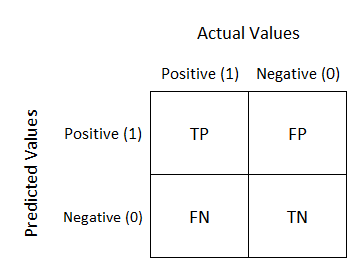

In [90]:
# Get the confusion matrix for both train and test
cm_lr = confusion_matrix(y_train, train_class_preds)
print(cm_lr)

[[12845  2808]
 [ 4937 10717]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

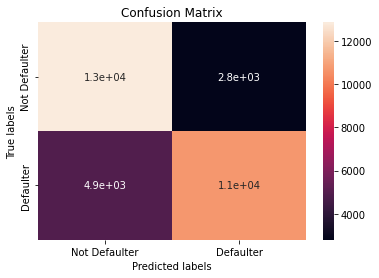

In [91]:
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(cm_lr, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Features

***Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.***

In [92]:
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })

In [93]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

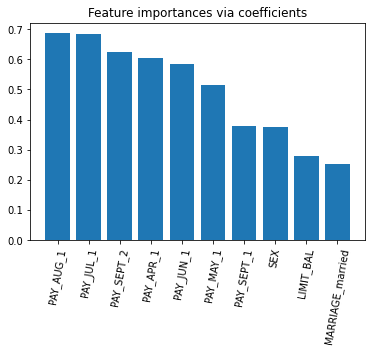

In [94]:
#plot the graph 
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

* **from the above feature importance graph we can say that the most important feature that make an impact on dependt variable are PAY_JUL_1,PAY_MAY_1,PAY_APR_1**

## ROC AUC curve

**An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:**

* True Positive Rate

* False Positive Rate

**AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve** 

In [95]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]

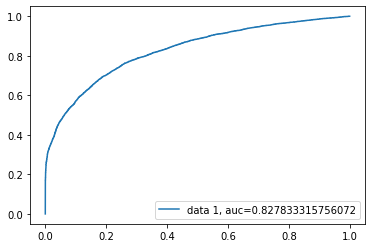

In [96]:
#plot the graph
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **Implementing RandomForest**

**A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting**

In [97]:
#import the packages
from sklearn.ensemble import RandomForestClassifier

In [98]:
#define the X and y value
X = credit_df_copy.drop(['default_payment_next_month','total_Payement_Value','Dues'],axis=1)
y = credit_df_copy['default_payment_next_month']

In [99]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

## Model Evaluation

In [101]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9993931069728814
The accuracy on test data is  0.837948252383114


In [102]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.837948252383114
The precision on test data is  0.808171206225681
The recall on test data is  0.8593297476210178
The f1 on test data is  0.8329657108482053
The roc_score on test data is  0.8391507979231159



**from the above evalution we get the results as below**
* The accuracy on test data is  **0.8340574541210038**
* The precision on test data is **0.8018158236057069**
* The recall on test data is **0.8570636351032858**
* The f1 on test data is **0.8285197346378074**
* The roc_score on test data is  **0.8354518955243524**

***We can see from above results that we are getting  around 99% train accuracy and 83% for test accuracy which depicts that model is overfitting. However our f1-score is around 82%, which is not bad.***

In [103]:
#set the parmeter
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [104]:
#fit the parameter
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  2.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [105]:
grid_rf_clf.best_score_

0.8209028353868751

In [106]:
grid_rf_clf.best_params_

{'max_depth': 30, 'n_estimators': 100}

In [107]:
optimal_rf_clf = grid_rf_clf.best_estimator_

In [108]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [109]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9984348548247995
The accuracy on test data is  0.8366513196290772


In [110]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.8366513196290772
The precision on test data is  0.8090791180285344
The recall on test data is  0.8562800274536719
The f1 on test data is  0.8320106702234078
The roc_score on test data is  0.8376778701673473


**from the above evalution we get the results as below**
* The accuracy on test data is  **0.8337332209324947**
* The precision on test data is **0.8020752269779508**
* The recall on test data is **0.856272500692329**
* The f1 on test data is **0.8282882400214305**
* The roc_score on test data is  **0.8350761210621055**

**After gridsearch we getting f1-sore approx 82%. As we have imbalanced dataset, F1- score is better parameter. Let's go ahead with other models and see if they can yield better result.**

## Confusion Matrix

**Confusion Matrix is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.**


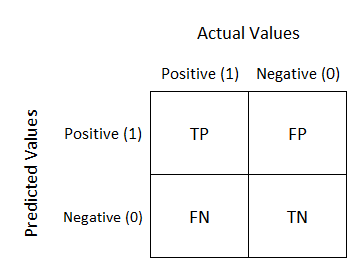

In [111]:
# Get the confusion matrix for both train and test
cm_rf = confusion_matrix(y_train, train_class_preds)
print(cm_rf)

[[15637    16]
 [   33 15621]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

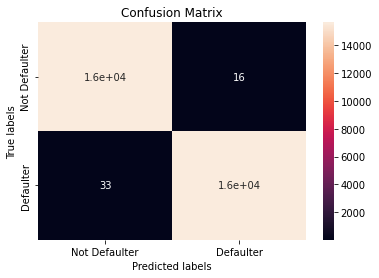

In [112]:
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Features

***Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.***

In [113]:
len(optimal_rf_clf.feature_importances_)

82

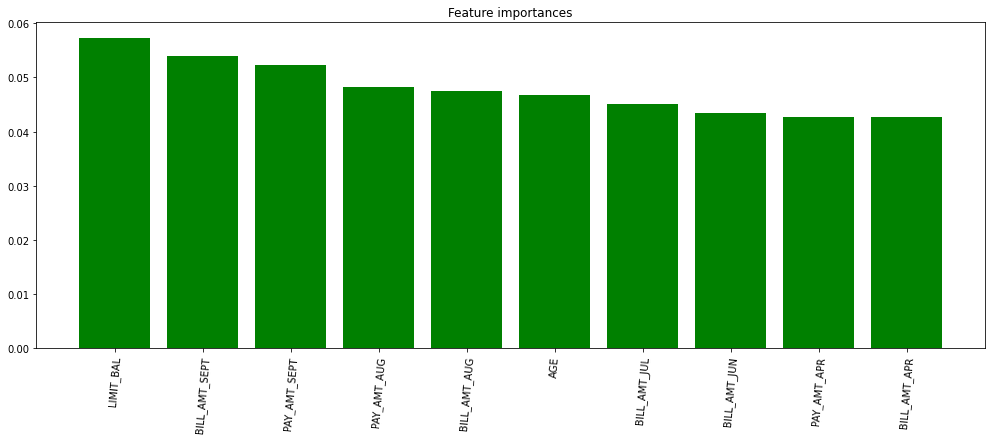

In [114]:
# Feature Importance
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="g",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()


* **from the above feature importance graph we can say that the most important feature that make an impact on dependt variable are LIMIT_BAL,PAY_AMT_SEPT**

## ROC AUC curve

**An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:**

* True Positive Rate

* False Positive Rate

**AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve**

In [115]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [116]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]

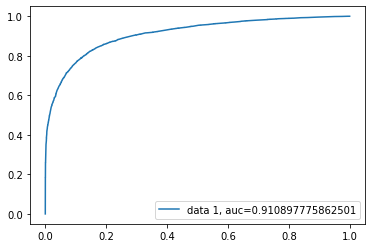

In [117]:
import sklearn.metrics as metrics
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **Implementing SVC**

**The Linear Support Vector Classifier (SVC) method applies a linear kernel function to perform classification and it performs well with a large number of samples. If we compare it with the SVC model, the Linear SVC has additional parameters such as penalty normalization which applies 'L1' or 'L2' and loss function.**

In [118]:
credit_df_svc = credit_df_copy.copy()

In [119]:
#import the packages
from sklearn.model_selection import GridSearchCV

In [120]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],   
              'kernel': ['rbf']} 

##train test split data set

In [121]:
#define the X and y value
X = credit_df_svc.drop(['default_payment_next_month','total_Payement_Value','Dues'],axis=1)
y = credit_df_svc['default_payment_next_month']

In [122]:
#standardise the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [123]:
#split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

**What is GridSearchCV?** 
* ***GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit our estimator (model) on your training set. So, in the end, we can select the best parameters from the listed hyperparameters***.

In [124]:
#set the parmeter
#fit the parameter
grid_clf = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 65.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=3)

In [125]:
optimal_SVC_clf = grid_clf.best_estimator_

In [126]:
grid_clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [127]:
grid_clf.best_score_

0.7746512309282386

In [128]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

## Model Evaluation

In [129]:
# Get the accuracy scores
train_accuracy_SVC = accuracy_score(train_class_preds,y_train)
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7526112371035232
The accuracy on test data is  0.7515725309642695


In [130]:
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)
test_precision_score_SVC = precision_score(test_class_preds,y_test)
test_recall_score_SVC = recall_score(test_class_preds,y_test)
test_f1_score_SVC = f1_score(test_class_preds,y_test)
test_roc_score_SVC = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_SVC)
print("The precision on test data is ", test_precision_score_SVC)
print("The recall on test data is ", test_recall_score_SVC)
print("The f1 on test data is ", test_f1_score_SVC)
print("The roc_score on test data is ", test_roc_score_SVC)

The accuracy on test data is  0.782828610336554
The precision on test data is  0.7154345006485084
The recall on test data is  0.8268625393494229
The f1 on test data is  0.767123287671233
The roc_score on test data is  0.7880598411032829


**from the above evalution we get the results as below**
* The accuracy on test data is  **0.766746644186499**
* The precision on test data is **0.6900129701686122**
* The recall on test data is **0.8150758388233492**
* The f1 on test data is **0.7473484582426073**
* The roc_score on test data is  **0.7731776765513193**

**We can see from above results that we are getting  around 74% train accuracy and 75% for test accuracy which is not bad. But f1- score is 74% approx, so there might be more ground for improvement.** 

## Confusion Matrix

**Confusion Matrix is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.**


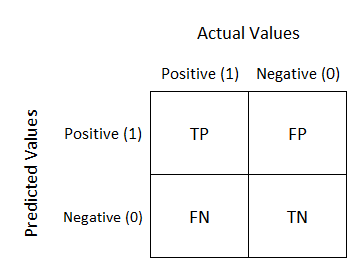

[[13786  1867]
 [ 4071 11583]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

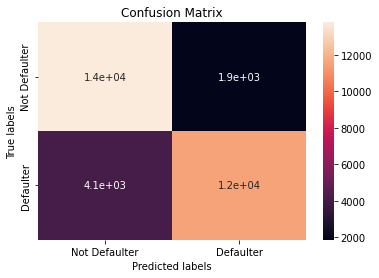

In [131]:
  # Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [132]:
optimal_SVC_clf

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [133]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

## ROC AUC curve

**An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:**

* True Positive Rate

* False Positive Rate

**AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve** 

In [134]:
y_pred_proba_SVC = optimal_SVC_clf.predict_proba(X_test)[::,1]

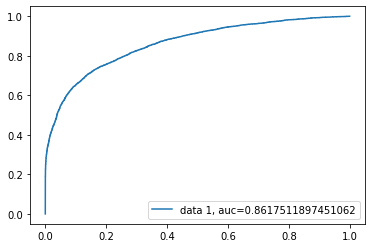

In [135]:
# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_SVC)
auc = roc_auc_score(y_test, y_pred_proba_SVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **Implementing XGBoost** 

**XGBoost provides a wrapper class to allow models to be treated like classifiers or regressors in the scikit-learn framework.**

**The XGBoost model for classification is called XGBClassifier. We can create and and fit it to our training dataset. Models are fit using the scikit-learn API and the model.fit() function.**

In [136]:
#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb

In [137]:
#The data is stored in a DMatrix object 
#label is used to define our outcome variable
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [138]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [139]:
#training our model 
num_round=50
from datetime import datetime 
start = datetime.now() 
xg=xgb.train(parameters,dtrain,num_round) 
stop = datetime.now()

In [140]:
#Execution time of the model 
execution_time_xgb = stop-start 
execution_time_xgb

datetime.timedelta(seconds=6, microseconds=555902)

In [141]:
#now predicting our model on train set 
train_class_preds_probs=xg.predict(dtrain) 
#now predicting our model on test set 
test_class_preds_probs =xg.predict(dtest) 

In [142]:
len(train_class_preds_probs)

31307

In [143]:
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [144]:
test_class_preds_probs[:20]

array([0.24118258, 0.21174866, 0.4163103 , 0.22317423, 0.26375672,
       0.2949519 , 0.19644688, 0.384698  , 0.6389956 , 0.31060517,
       0.65225816, 0.30281854, 0.674929  , 0.52097374, 0.44525096,
       0.2612419 , 0.46986264, 0.45503202, 0.76871574, 0.3231746 ],
      dtype=float32)

In [145]:
test_class_preds[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0]

In [146]:
len(y_train)

31307

In [147]:
len(train_class_preds)

31307

## **Model Evaluation**

In [148]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.7884179257035168
The accuracy on test data is  0.778548732248233


In [149]:
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)
test_precision_xgb = precision_score(test_class_preds,y_test)
test_recall_score_xgb = recall_score(test_class_preds,y_test)
test_f1_score_xgb = f1_score(test_class_preds,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on test data is  0.778548732248233
The precision on test data is  0.709727626459144
The recall on test data is  0.8229808993833659
The f1 on test data is  0.7621700675534508
The roc_score on train data is  0.7839254702115187


**from the above evalution we get the results as below**
* The accuracy on test data is  **0.7531288502691136**
* The precision on test data is **0.677561608300908**
* The recall on test data is **0.79816653934301**
* The f1 on test data is **0.732935811995791**
* The roc_score on test data is  **0.7590427108612301**

## **Confusion Matrix**

## Confusion Matrix

**Confusion Matrix is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.**


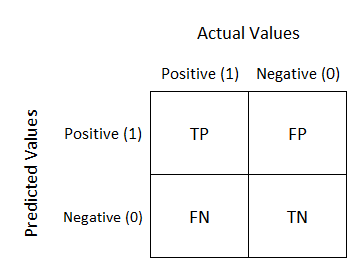

In [150]:
# Get the confusion matrix for both train and test
cm_xg = confusion_matrix(y_train, train_class_preds)
print(cm_xg)

[[13478  2175]
 [ 4449 11205]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

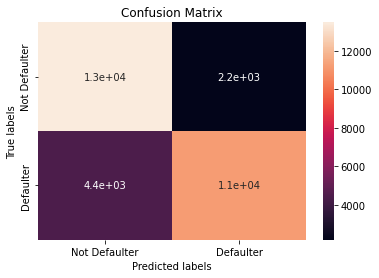

In [151]:
labels = ['Not Defaulter', 'Defaulter']
ax= plt.subplot()
sns.heatmap(cm_xg, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **Hyperparameter Tuning**

* **Hyperparameters are crucial as they control the overall behaviour of a machine learning model. The ultimate goal is to find an optimal combination of hyperparameters that minimizes a predefined loss function to give better results.**
* **We can leverage the maximum power of XGBoost by tuning its hyperparameters**

In [152]:
#import the packages
from xgboost import  XGBClassifier

In [153]:
#define the X and y value
X = credit_df_copy.drop(['default_payment_next_month','total_Payement_Value','Dues'],axis=1)
y = credit_df_copy['default_payment_next_month']

In [154]:
#split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [155]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1,iid=False, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  5.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=F

In [156]:
 gsearch1.best_score_

0.8242246792444837

In [157]:
optimal_xgb = gsearch1.best_estimator_

In [158]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [159]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  0.9169195387612994
The accuracy on test data is  0.8326956747292653


In [160]:
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  0.8326956747292653
The precision on test data is  0.7961089494163424
The recall on test data is  0.8589420654911839
The f1 on test data is  0.8263327948303716
The roc_score on train data is  0.8344861384857732


**from the above evalution we get the results as below**
* The accuracy on test data is  **0.787562414888788**
* The precision on test data is **0.7316472114137483**
* The recall on test data is **0.8237441588785047**
* The f1 on test data is **0.7749690891605989**
* The roc_score on test data is  **0.7912025355223038**

In [161]:
pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

,importance_xgb
PAY_AUG_1,0.175567
PAY_JUL_1,0.112137
PAY_AUG_2,0.097989
PAY_APR_1,0.054996
PAY_JUN_1,0.049099
PAY_SEPT_2,0.047878
PAY_MAY_1,0.038153
SEX,0.030951
PAY_AUG_0,0.025421
PAY_SEPT_1,0.024241


## Feature Importance


***Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.***

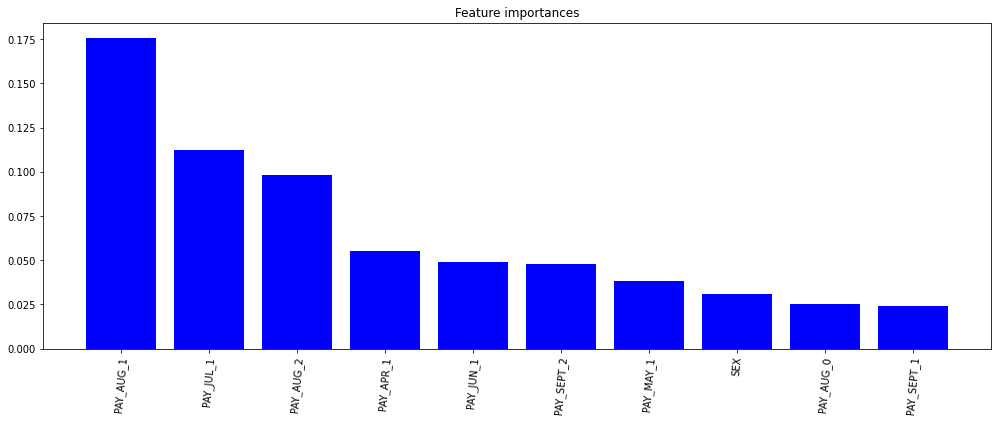

In [162]:
# Feature Importance
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="b",  align="center")
plt.xticks(feature_importances_xgb.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

* **from the above feature importance graph we can say that the most important feature that make an impact on dependt variable are PAY_AUG_1**

##ROC_AUC curve

**An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:**

* True Positive Rate

* False Positive Rate

**AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve** 

In [163]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

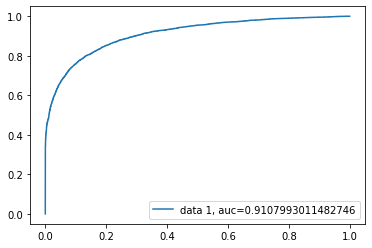

In [164]:
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **Evaluating the models**

In [165]:
recall_score

<function sklearn.metrics._classification.recall_score>

In [166]:
#create a table of all models all score for comparison 
classifiers = ['Logistic Regression', 'SVC', 'Random Forest CLf', 'Xgboost Clf']
train_accuracy = [train_accuracy_lr, train_accuracy_SVC, train_accuracy_rf, train_accuracy_xgb_tuned]
test_accuracy = [test_accuracy_lr, test_accuracy_SVC, test_accuracy_rf, test_accuracy_xgb_tuned]
precision_score = [test_precision_score_lr, test_precision_score_SVC, test_precision_score_rf, test_precision_xgb_tuned]
recall_score = [test_recall_score_lr, test_recall_score_SVC, test_recall_score_rf, test_recall_score_xgb_tuned]
f1_score = [test_f1_score_lr, test_f1_score_SVC, test_f1_score_rf, test_f1_score_xgb_tuned]

In [167]:
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score })

,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.752611,0.751573,0.684695,0.790388,0.733755
1,SVC,0.810330,0.782829,0.715435,0.826863,0.767123
2,Random Forest CLf,0.998435,0.836651,0.809079,0.856280,0.832011
3,Xgboost Clf,0.916920,0.832696,0.796109,0.858942,0.826333


**from the above table we can find that xgboost classifier perform best among those models**

# **Plotting ROC AUC for all the models**

In [168]:
classifiers_proba = [(optimized_clf, y_preds_proba_lr), 
               (optimal_rf_clf, y_preds_proba_rf), 
               (optimal_xgb, y_preds_proba_xgb),
               (optimal_SVC_clf,y_pred_proba_SVC)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [169]:
result_table

,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 0.00012968486577616392, 0.0001...","[0.0, 0.00012970168612191958, 0.09948119325551...",0.827833
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.055771725032425425, 0.0559014267185473...",0.910898
XGBClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00012970168612191958, 0.00103761348897...",0.910799
SVC,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.000129684865776163...","[0.0, 0.00012970168612191958, 0.09584954604409...",0.861751


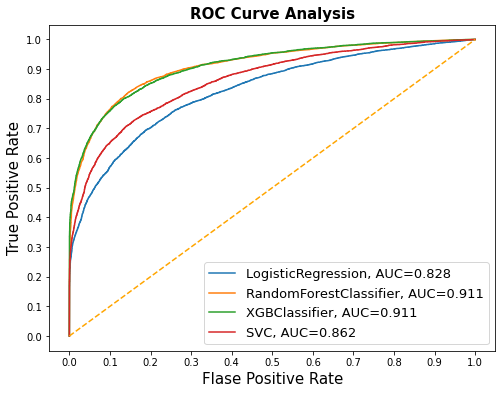

In [170]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# **Model Recommendation**

We recommend recall = 0.8, however, the threshold can be adjusted to reach higher recall.

In [171]:
# Compute precision, recall and threshold of Random Forest

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)

recalls_80 = recalls[np.argmin(recalls >= 0.80)]               # Recommend recall score = 0.8
precision_80 = precisions[np.argmin(recalls >= 0.80)]
threshold_80_recall = thresholds[np.argmin(recalls >= 0.80)]

thresholds = np.append(thresholds, 1)

recalls_80, precision_80, threshold_80_recall


(0.7998702983138781, 0.8566467564939575, 0.49473032)

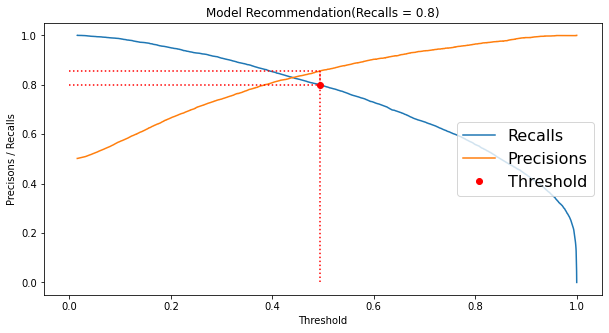

In [172]:
# Plot recommended recall = 0.8

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(thresholds, recalls, label='Recalls')
ax.plot(thresholds, precisions, label='Precisions')

ax.plot([threshold_80_recall, threshold_80_recall], [precision_80, recalls_80], "r:" )
ax.plot([threshold_80_recall, threshold_80_recall], [0, precision_80], "r:")
ax.plot([0, threshold_80_recall], [precision_80, precision_80], "r:")
ax.plot([0, threshold_80_recall], [recalls_80, recalls_80], "r:")
ax.plot([threshold_80_recall], [recalls_80], "ro", label='Threshold')

ax.set_xlabel('Threshold')
ax.set_ylabel('Precisons / Recalls')
ax.legend(loc='center right',fontsize=16)
plt.title('Model Recommendation(Recalls = 0.8)')
plt.savefig('recommended_recall')
plt.show()


# **Feature Importances**

Text(0.5, 1.0, 'Features importance')

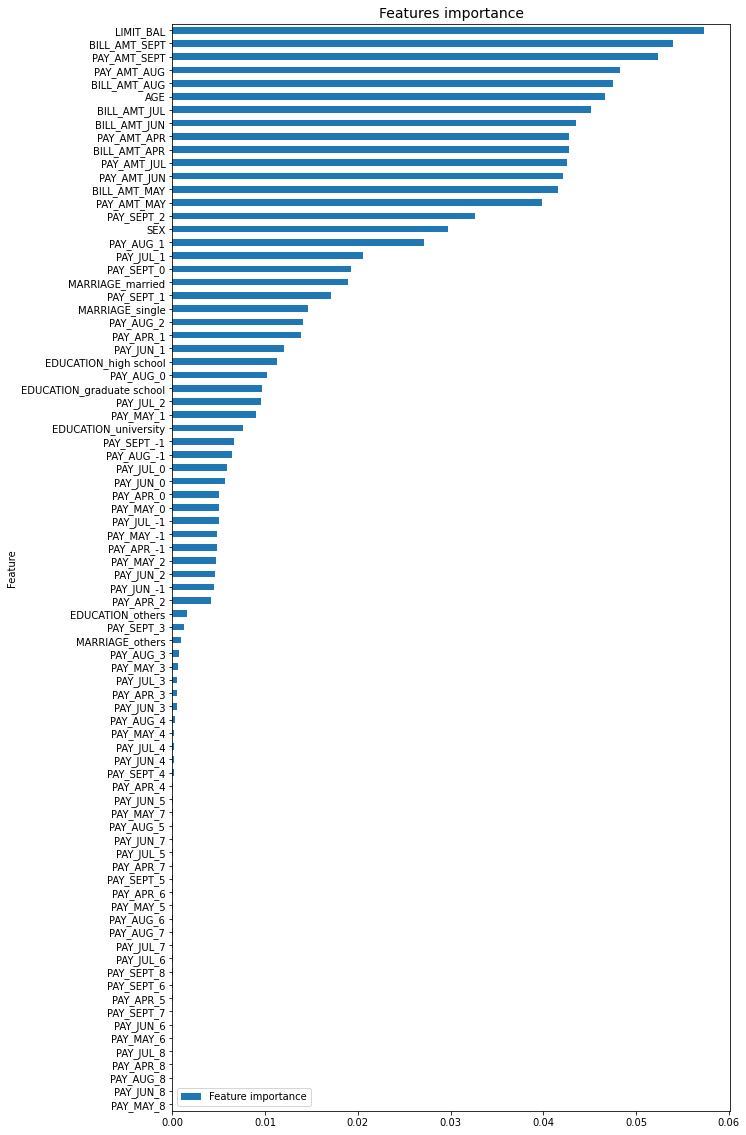

In [173]:
fea_df = pd.DataFrame({'Feature': columns, 'Feature importance': optimal_rf_clf.feature_importances_})
fea_df = fea_df.sort_values(by='Feature importance')

figure, ax = plt.subplots(figsize = (10,20))
fea_df.plot.barh(x='Feature',y='Feature importance', ax=ax)
plt.title('Features importance',fontsize=14)

**"LIMT_BAL","BILL_AMT_SEPT" AND "PAY_AMT_SEPT" are the most recent 2 months' payment status and they are the strongest predictors of future payment default risk.**

#**Conclusion**

XGBoost model has the highest recall, if the business cares recall the most, then this model is the best candidate. If the balance of recall and precision is the most important metric, then Random Forest is the ideal model. Since Random Forest has slightly lower recall but much higher precision than Logistic Regression, I would recommend Random Forest. 

* Data categorical variables had minority classes which were added to their closest majority class
* There were not huge gap but female clients tended to default the most.
* Labels of the data were imbalanced and had a significant difference.
* Gradient boost gave the highest accuracy of 82% on test dataset.
* Repayment in the month of september tended to be the most important feature for our machine learning model.
* The best **accuracy** is obtained for the **Random forest** and **XGBoost classifier.**
 
* In general, all models have comparable accuracy. Nevertheless, because the classes are imbalanced (the proportion of non-default credit cards is higher than default) this metric is misleading. 
 
* Furthermore, **accuracy** does not consider the rate of **false positives** (non-default credits cards that were predicted as default) and **false negatives** (default credit cards that were incorrectly predicted as non-default). 
 
* Both cases have negative impact on the bank, since **false positives** leads to unsatisfied customers and **false negatives** leads to financial loss.
 
* From above table we can see that **XGBoost Classifier** having **Recall**, **F1-score**, and **ROC Score** values equals 82%, 77%, and 86% and **Random forest Classifier** having **Recall**, **F1-score**, and **ROC Score** values equals 81%, 75%, and 84%.
 
* **XGBoost Classifier** and **Decision Tree Classifier** are giving us the best **Recall, F1-score**, and **ROC Score** among other algorithms. We can conclude that these two algorithms are the best to predict whether the credit card is default or not default according to our analysis.